<a href="https://colab.research.google.com/github/PrabishaPradeep/Dsa/blob/main/prabisha_RE%20Exit_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exit Test

You have been hired by a real estate company to help them understand the factors influencing property prices in West Bandung Regency and Bandung City. The company has provided you with a dataset containing various attributes of properties, including their prices, locations, number of bedrooms, bathrooms, carports, land size, and building size. They are particularly interested in knowing:

Key Drivers of Price: Identify which features (e.g., location, number of bedrooms, land size) have the most significant impact on property prices.
Location Analysis: Determine if there are noticeable differences in property prices between West Bandung Regency and Bandung City, and what factors contribute to these differences.
Property Recommendations: Suggest what kind of properties would be a good investment for clients looking to buy a house with a budget of less than 1 billion IDR, taking into account both location and property features.

### Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Read the dataset into python environment

In [ ]:
data = pd.read_excel('/content/dataset.xlsx')
data

,Unnamed: 0,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,0,1.600000e+09,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400
1,1,8.500000e+08,Parongpong,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,2,8.750000e+08,Buah Batu,3,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,3,1.750000e+09,Bojongsoang,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4,4.900000e+09,Bojongloa Kidul,4,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271
...,...,...,...,...,...,...,...,...,...,...,...,...
32531,53461,4.750000e+08,Rancasari,2,1.0,1.0,60.0,65.0,10.0,Bandung City,-6.953536,107.675210
32532,53462,7.000000e+09,Bojongloa Kidul,5,5.0,2.0,426.0,500.0,10.0,Bandung City,-6.947036,107.596271
32533,53463,5.500000e+09,Sukasari,5,3.0,2.0,427.0,283.0,10.0,Bandung City,-6.863000,107.588100
32534,53464,3.950000e+09,Regol,4,3.0,2.0,182.0,380.0,10.0,Bandung City,-6.939713,107.613797


# Exploratory Data Analysis

### Check basic information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32536 entries, 0 to 32535
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    32536 non-null  int64  
 1   Price         32536 non-null  float64
 2   Location      32527 non-null  object 
 3   Bedroom       32536 non-null  int64  
 4   Bathroom      32521 non-null  float64
 5   Carport       32521 non-null  float64
 6   Land          32533 non-null  float64
 7   Building      32527 non-null  float64
 8   Month         32527 non-null  float64
 9   City/Regency  32527 non-null  object 
 10  Latitude      32526 non-null  float64
 11  Longitude     32527 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 3.0+ MB


***Dataset has 12 features and  32536 entries. Among that, 10 features are numerical (8 float and 2 integer) and 2 are categorical features.***

### Check statistical summary

In [ ]:
data.describe()

,Unnamed: 0,Price,Bedroom,Bathroom,Carport,Land,Building,Month,Latitude,Longitude
count,32536.000000,3.253600e+04,32536.000000,32521.000000,32521.000000,32533.000000,32527.000000,32527.000000,32526.000000,32527.000000
mean,25966.194308,2.554932e+09,3.524158,2.527721,1.052120,181.392002,179.397485,8.988533,-6.923486,107.625922
std,15468.621566,1.879994e+09,1.235943,1.074318,0.796993,107.491313,108.516303,0.821016,0.051064,0.075701
min,0.000000,1.020000e+07,1.000000,1.000000,0.000000,37.000000,37.000000,8.000000,-7.230321,107.434849
25%,12565.750000,1.200000e+09,3.000000,2.000000,0.000000,105.000000,100.000000,8.000000,-6.952981,107.590747
50%,25392.000000,2.000000e+09,3.000000,2.000000,1.000000,147.000000,150.000000,9.000000,-6.931934,107.626219
75%,39255.250000,3.365000e+09,4.000000,3.000000,2.000000,225.000000,235.000000,10.000000,-6.886334,107.659881
max,53466.000000,9.700000e+09,8.000000,7.000000,3.000000,612.000000,585.000000,10.000000,-6.734761,107.886580




1. property prices ranges from around 10.2 million to nearly 9.7 billion. this suggeest a wide market where the property prices vary according tto factors such as bedroom,bathrooms,carport or any other features.  
2.   The first quartile (25th percentile) is around 1.2 billion, meaning that 25% of properties are priced below this point, while the third quartile (75th percentile) is around 3.36 billion, suggesting that 75% of properties are below this price point.
3.    features such as Bathroom, Carport, Land, Building, Month,latitude ,longitude have missing values





### Check for unique values

In [ ]:
(data.nunique()).sort_values(ascending=False)

,0
Unnamed: 0,32536
Price,844
Land,520
Building,416
Location,66
Latitude,66
Longitude,66
Bedroom,8
Bathroom,7
Carport,4


***the first feature has full of unique values.***

### Check for duplicates

In [ ]:
data.duplicated().sum()

0

***There are no duplicate entries in the dataset.***

### Check for null values

In [ ]:
data.isna().sum().sort_values(ascending=False)

,0
Bathroom,15
Carport,15
Latitude,10
Location,9
Building,9
Month,9
City/Regency,9
Longitude,9
Land,3
Unnamed: 0,0


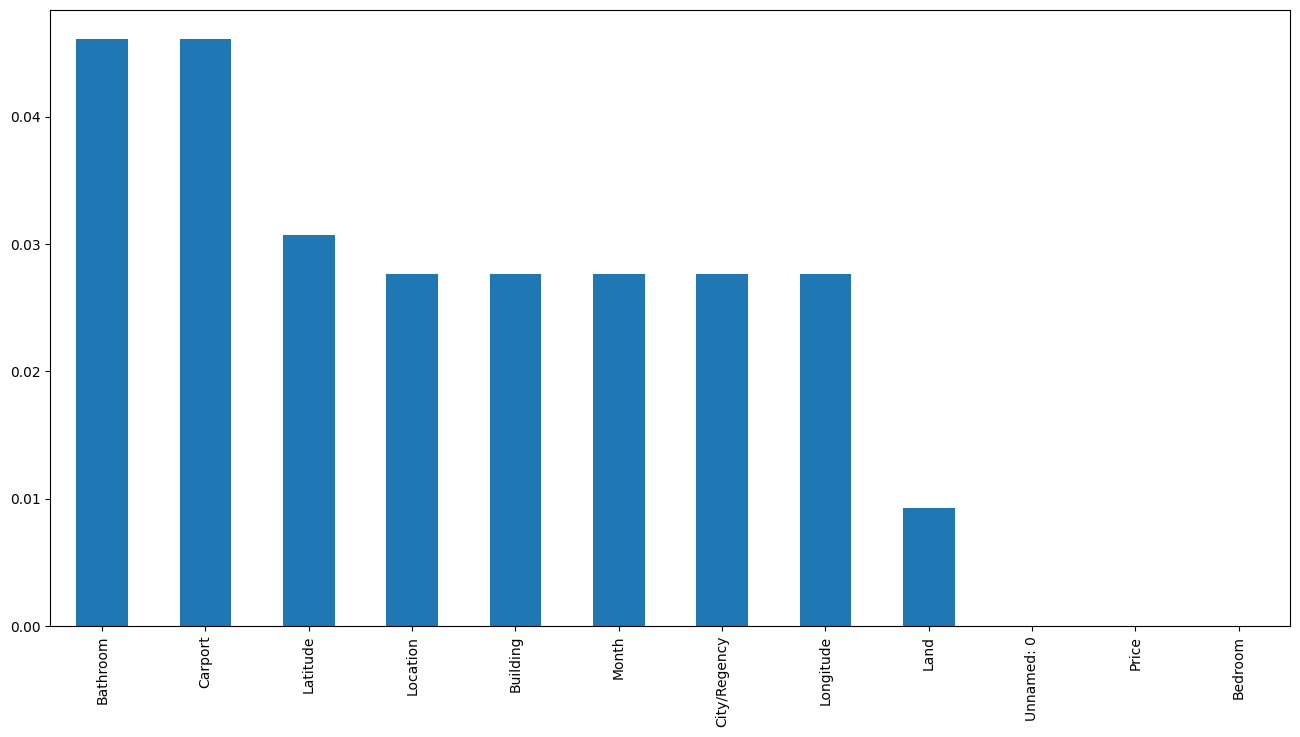

In [ ]:
plt.figure(figsize=(16, 8))
(((data.isnull().sum()/len(data))*100).sort_values(ascending=False)).plot(kind='bar')
plt.show()

***The features  Bathroom , Carport, Latitude, Location , Building , Month , City/Regency, Longitude, and Land have missing values wheras  features without missing values are Price, Bedroom, and Unnamed: 0.***

### Check for outliers

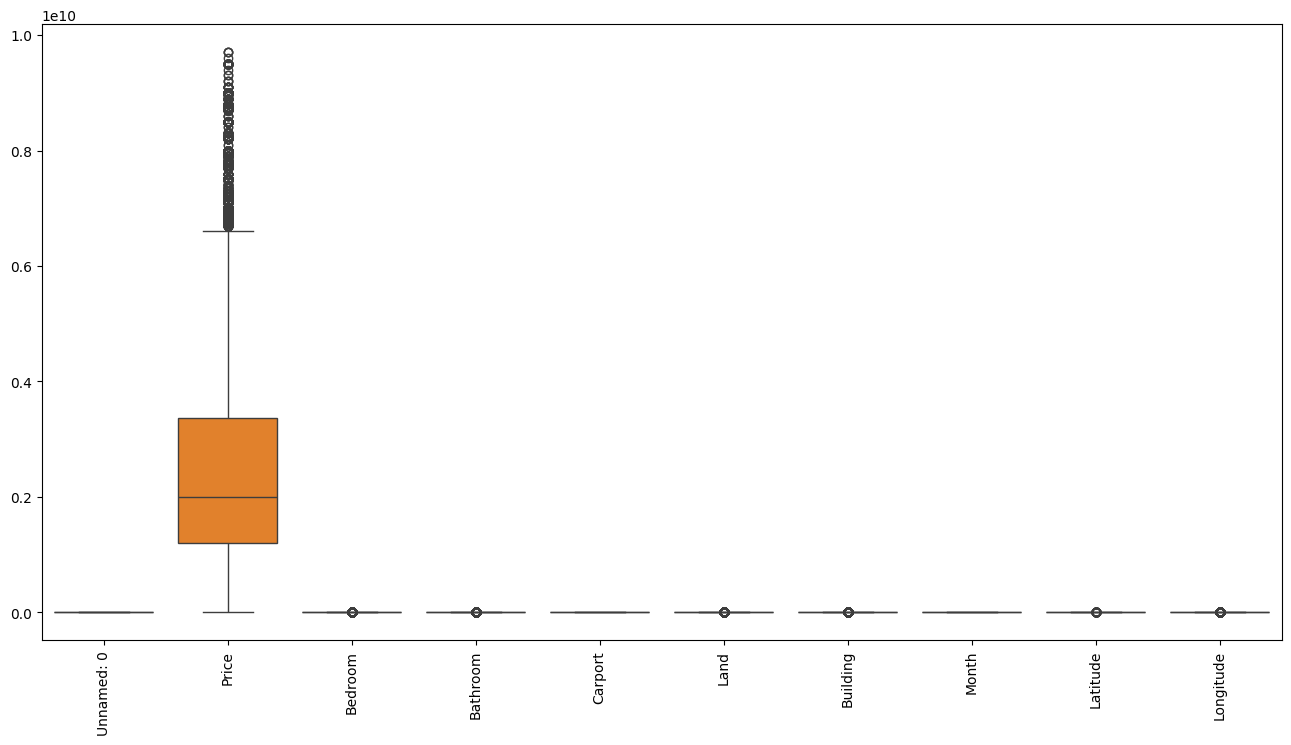

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

***Outliers are present in price only.***

### Distribution of features

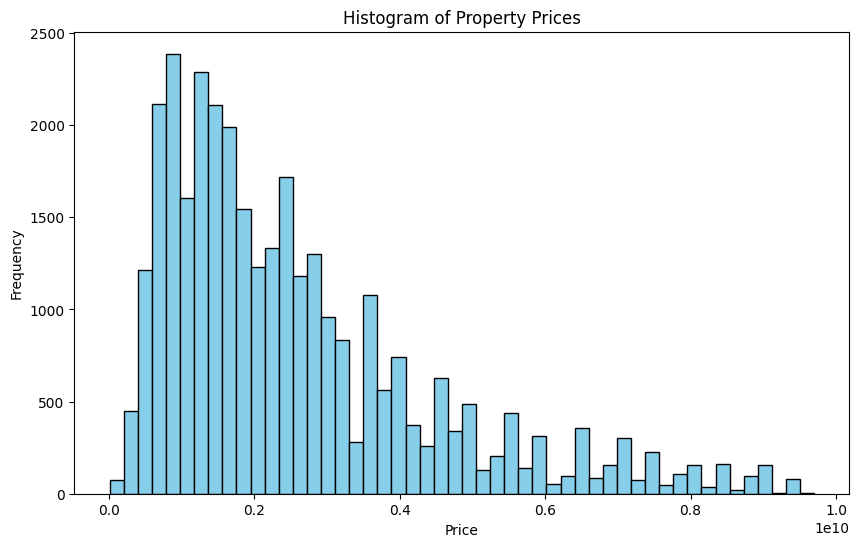

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['Price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


***the plot shows that most properties are priced lower, while a few high-value properties increase the average.This is common in real estate markets where luxury properties are present.***

## Correlation

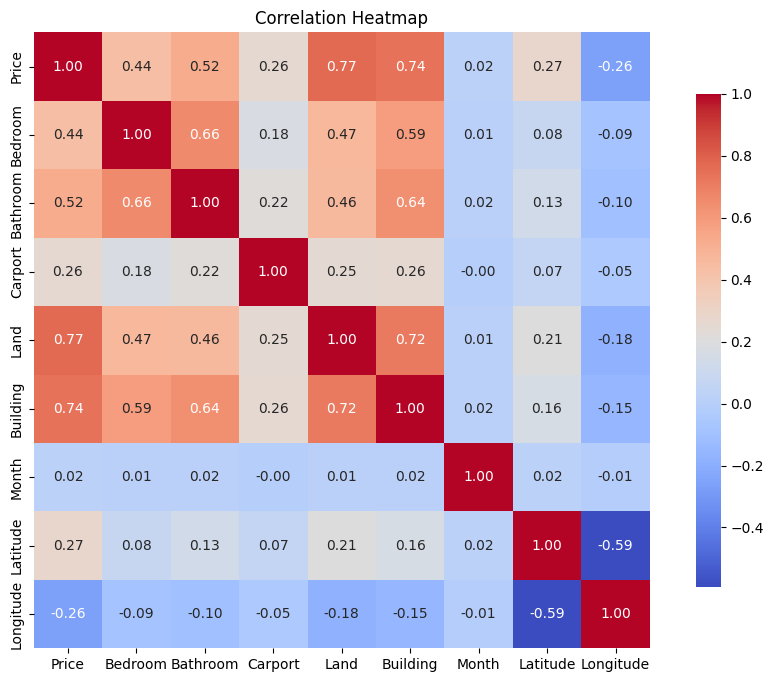

In [ ]:
num_col = ['Price', 'Bedroom', 'Bathroom', 'Carport', 'Land', 'Building', 'Month', 'Latitude', 'Longitude']
correlation_matrix = data[num_col].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()


***Inference : The features land and building have strong positive correlation with price which indicates higher the land and building area higher the price.***

# Data Pre - Processing

### Check for null values

In [ ]:
data.isnull().sum().sort_values(ascending=False)

,0
Bathroom,15
Carport,15
Latitude,10
Location,9
Building,9
Month,9
City/Regency,9
Longitude,9
Land,3
Unnamed: 0,0


### Null value imputation

In [ ]:
# Fill missing values for numerical columns with the mean and categorical feature using mode
data['Bathroom'].fillna(data['Bathroom'].mean(), inplace=True)
data['Carport'].fillna(data['Carport'].mean(), inplace=True)
data['Latitude'].fillna(data['Latitude'].mean(), inplace=True)
data['Building'].fillna(data['Building'].mean(), inplace=True)
data['Month'].fillna(data['Month'].mean(), inplace=True)
data['Longitude'].fillna(data['Longitude'].mean(), inplace=True)
data['Land'].fillna(data['Land'].mean(), inplace=True)
data['City/Regency'].fillna(data['City/Regency'].mode()[0], inplace=True)
data['Location'].fillna(data['Location'].mode()[0], inplace=True)


<ipython-input-13-af430278dccb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Bathroom'].fillna(data['Bathroom'].mean(), inplace=True)
<ipython-input-13-af430278dccb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

### Check again for null values

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
Price,0
Location,0
Bedroom,0
Bathroom,0
Carport,0
Land,0
Building,0
Month,0
City/Regency,0


***All null values are imputed properly.***

### Outlier Treatment

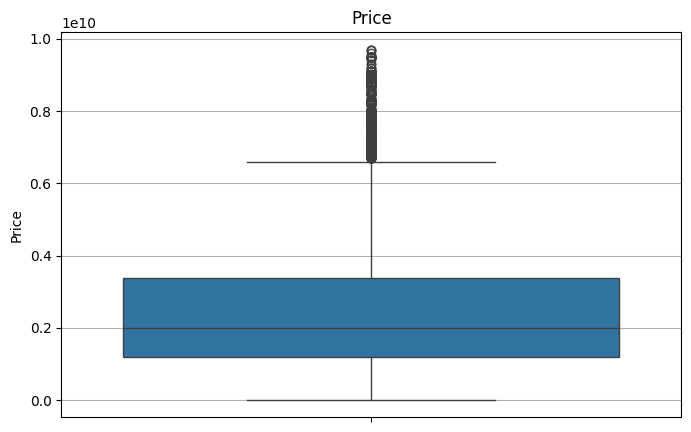

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=data['Price'])
plt.title('Price')
plt.ylabel('Price')
plt.grid(axis='y')
plt.show()

***Outliers are present above upper whisker only.***

In [ ]:
price_skewness = data['Price'].skew()
price_skewness

1.3792814952348387

***The distribution of prices is positively skewed, indicating that there is a longer tail on the right side.
This suggests that while most of the prices are lower, there are some higher prices pulling the mean upwards.***

In [ ]:
Q1=np.percentile(data['Price'],25,method='midpoint')
Q3=np.percentile(data['Price'],75,method='midpoint')
IQR=Q3-Q1
up_lim=Q3+1.5*IQR
outliers=[]
for j in data['Price']:
  if (j > up_lim):
    outliers.append(j)
data['Price']=data['Price'].clip(upper=up_lim)

### Check again for outliers

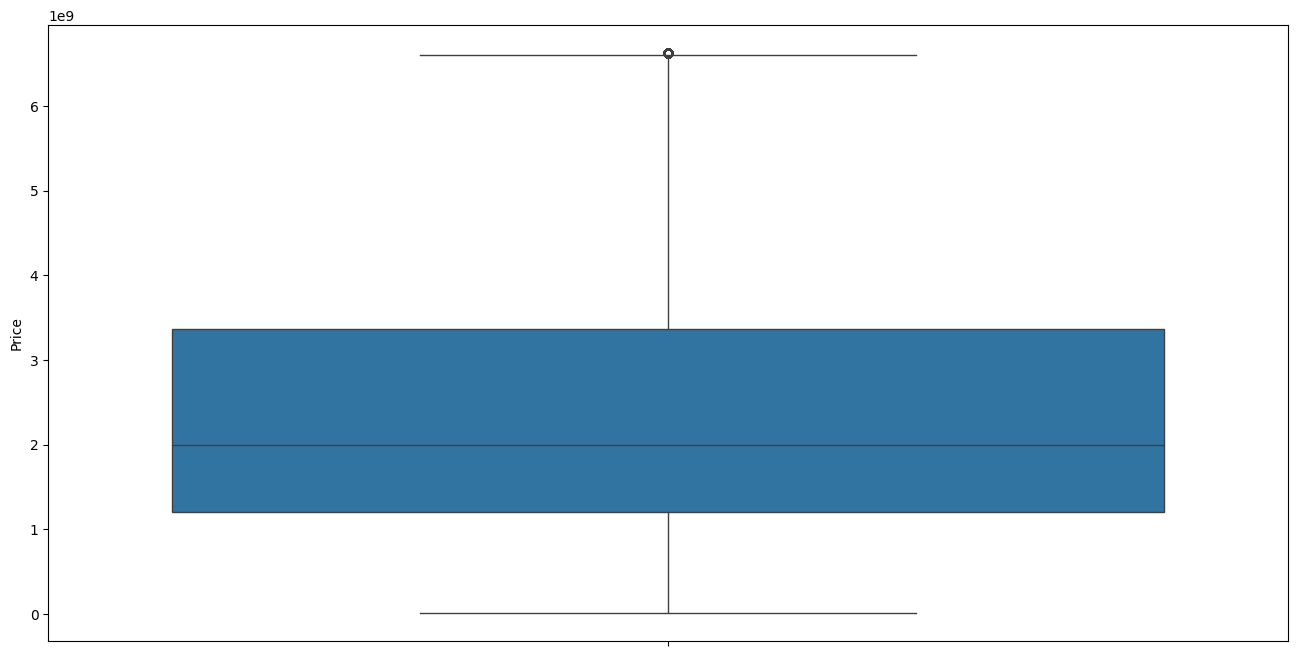

In [ ]:
plt.figure(figsize=(16, 8))
plt.xticks(rotation=90)
sns.boxplot(data['Price'])
plt.show()

***All outliers are treated properly.***

# Feature Engineering

Since 'Unnamed: 0' has full of unique values, make it as index column

In [ ]:
data.set_index('Unnamed: 0',inplace=True)

month column shows (0.02)negligible correlation, indicating that the month of the sale does not significantly influence the price. we can drop that column

In [ ]:
data = data.drop(columns=['Month'])

### Label Encoding

Do label encoding in order to convert all categorical features into numerical features

In [ ]:
data = pd.get_dummies(data, columns=['Location', 'City/Regency'], drop_first=True)


***All categorical features are converted to numerical features.***

### Seperating the target (y) and independent variables (x)

In [ ]:
x = data.drop('Price', axis=1)
y=data['Price'].values.reshape(-1,1)

### Standard scaling x data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x = sc.fit_transform(x)

### Train test split

Take test size as 0.2 since the size of dataset is medium

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# Modelling

In [30]:
 #Model Building
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Model Evaluation
results = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[model_name] = {'MSE': mse, 'R2': r2}

# Cross-validation and Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]})

In [32]:
best_model = grid_search.best_estimator_
best_predictions = best_model.predict(x_test)
best_mse = mean_squared_error(y_test, best_predictions)
best_r2 = r2_score(y_test, best_predictions)

In [34]:
# Recommendations for property buyers
budget = 1000000000  # 1 billion IDR
affordable_properties = data[data['Price'] < budget]

In [36]:
# Output results
summary = data.describe()
print("Summary Statistics:\n", summary)
print("Model Evaluation Results:\n", results)
print("Best Model MSE:", best_mse)
print("Best Model R2:", best_r2)
print("Affordable Properties:\n", affordable_properties[['location', 'bedrooms', 'bathrooms', 'land_size', 'building_size', 'price']])

Summary Statistics:
               Price       Bedroom      Bathroom      Carport          Land  \
count  3.253600e+04  32536.000000  32536.000000  32536.00000  32536.000000   
mean   2.492462e+09      3.524158      2.527721      1.05212    181.392002   
std    1.706438e+09      1.235943      1.074070      0.79681    107.486357   
min    1.020000e+07      1.000000      1.000000      0.00000     37.000000   
25%    1.200000e+09      3.000000      2.000000      0.00000    105.000000   
50%    2.000000e+09      3.000000      2.000000      1.00000    147.000000   
75%    3.365000e+09      4.000000      3.000000      2.00000    225.000000   
max    6.625000e+09      8.000000      7.000000      3.00000    612.000000   

           Building      Latitude     Longitude  
count  32536.000000  32536.000000  32536.000000  
mean     179.397485     -6.923486    107.625922  
std      108.501293      0.051056      0.075690  
min       37.000000     -7.230321    107.434849  
25%      100.000000     -6

KeyError: "None of [Index(['location', 'bedrooms', 'bathrooms', 'land_size', 'building_size',\n       'price'],\n      dtype='object')] are in the [columns]"